In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot)

# Functions

In [3]:
delta_timeseries_baseplot.fx <- function(df, var1, var2, clrby, colpal) {
    
    mytab <- table(df$Patient, df[[var1]])
    # select those samples with a baseline
    baseline_patients <- rownames(mytab)[mytab[, 1] == 1]
    df1 <- df[df$Patient %in% baseline_patients, ]
    result <- df1 %>%
        group_by(Patient) %>%
        mutate(Difference = eval(parse(text = var2)) - eval(parse(text = var2))[eval(parse(text = var1)) == "X01"])

    p0 <- ggplot(
        result,
        aes(x = eval(parse(text = var1)), y = Difference)
    ) +
        geom_point(aes(color = eval(parse(text = clrby))), cex = 2) +
        geom_line(aes(group = Patient, color = eval(parse(text = clrby)))) +
        scale_color_manual(values = colpal) +
        myplot +
        myaxis +
        theme(
            axis.text.x = element_text(angle = 45, hjust = 1),
            axis.title.x = element_blank()
        )
    return(p0)
}

In [4]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div1 <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
meta_div <- meta_div1[ !is.na(meta_div1$TRB), ]

In [9]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

Separate PBMC and cfDNA

In [10]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [11]:
dim(pbmc)

[1] 197  64

## Plots for chemo cycles - paired samples

### PBMC

In [12]:
mytab <- table(pbmc$Patient, pbmc$cycle)

In [13]:
paired_patients <- rownames(mytab)[rowSums(mytab == 1) == 5]

In [14]:
paired_patients

[1] "CHP_347" "CHP_350" "CHP_357" "CHP_405"

In [15]:
paired_pbmc <- pbmc[ pbmc$Patient %in% paired_patients,]

In [16]:
# ggplot(paired_pbmc, aes(x= cycle, y= log10shann, group = Patient) ) + 
# facet_grid(Patient ~ ., scales = "free_y") + 
# geom_line()

### cfDNA

In [17]:
mytab <- table(cfdna$Patient, cfdna$cycle)

In [18]:
paired_patients <- rownames(mytab)[rowSums(mytab == 1) >= 4]

In [19]:
paired_cfdna <- cfdna[ cfdna$Patient %in% paired_patients,]

In [20]:
p_cfdna_paired <- ggplot(
  paired_cfdna,
  aes(x = cycle, y = log10shann)
) +
#  geom_boxplot() + #  
  geom_point(aes(color = cancergroup), cex = 2) +
  geom_line(aes(group = Patient, color = cancergroup)) + 
  scale_color_manual(values= group_col) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100) ) , labels = c(1,10,100)) +
 # labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity") +
  facet_wrap(~cancergroup, nrow = 1)

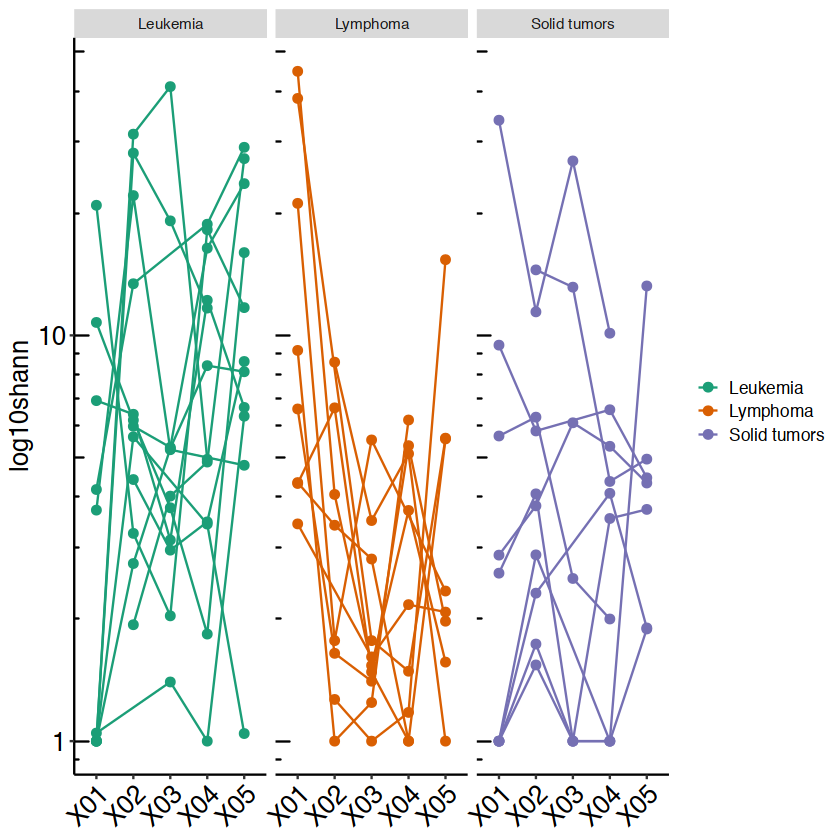

In [21]:
p_cfdna_paired

## change relative to with baseline

### PBMC

In [22]:
p0 <- delta_timeseries_baseplot.fx(pbmc, "cycle", "log10shann", "cancergroup", group_col)

In [23]:
p0 <- p0 +  facet_wrap(~cancergroup, nrow = 1)

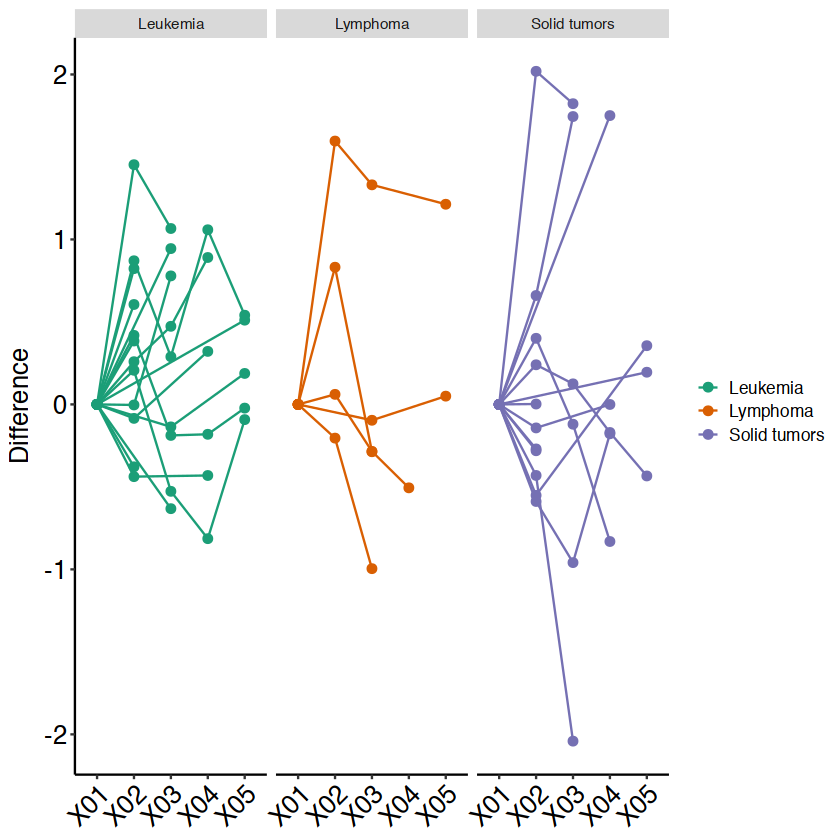

In [24]:
p0

In [25]:
pdf(paste0(plotpath, "delta_shann_cancergroup_facet.pdf"), width = 8, height = 6)
p0 + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5)) +
          ylab("Change in TCR diversity")
dev.off()

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


pdf 
  2

In [26]:
# myres <- table(result$Patient)
# rownames(myres)[ myres != 1]
# p1 <- ggplot(result[ result$Patient %in% rownames(myres)[ myres != 1], ], aes(x= cycle, y= Difference, group = Patient) ) + 
# facet_grid(Patient ~ ., scales = "free_y") + 
# geom_line()

### cfDNA

In [27]:
p1 <- delta_timeseries_baseplot.fx(cfdna, "cycle", "log10shann", "cancergroup", group_col)

In [28]:
p1 <- p1 +
  labs(title = "", y = "Change in cfTCR Diversity") +
  facet_wrap(~cancergroup, nrow = 1)


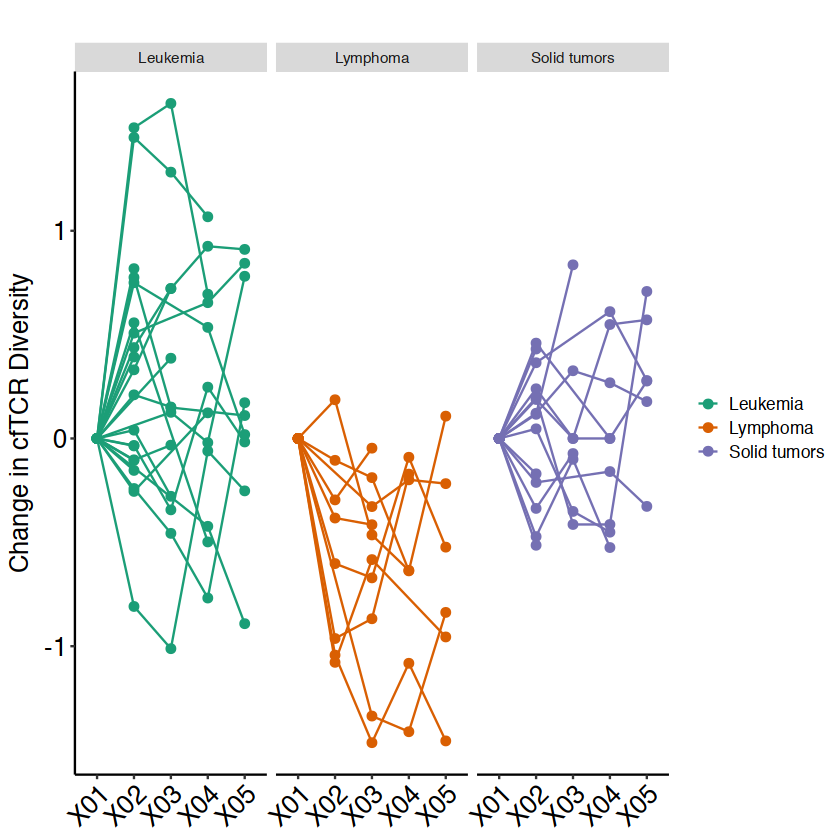

In [29]:
p1

In [30]:
pdf(paste0(plotpath, "delta_cfDNAshann_cancergroup_facet.pdf"), width = 8, height = 6)
p1 + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5)) +
          ylab("Change in cfTCR diversity")
dev.off()

pdf 
  2

In [31]:
colnames(cfdna)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

In [32]:
pbmc1 <- meta_div1[ meta_div1$sampletype == "PBMC" & !is.na(meta_div1$`Naïve/TE`),]

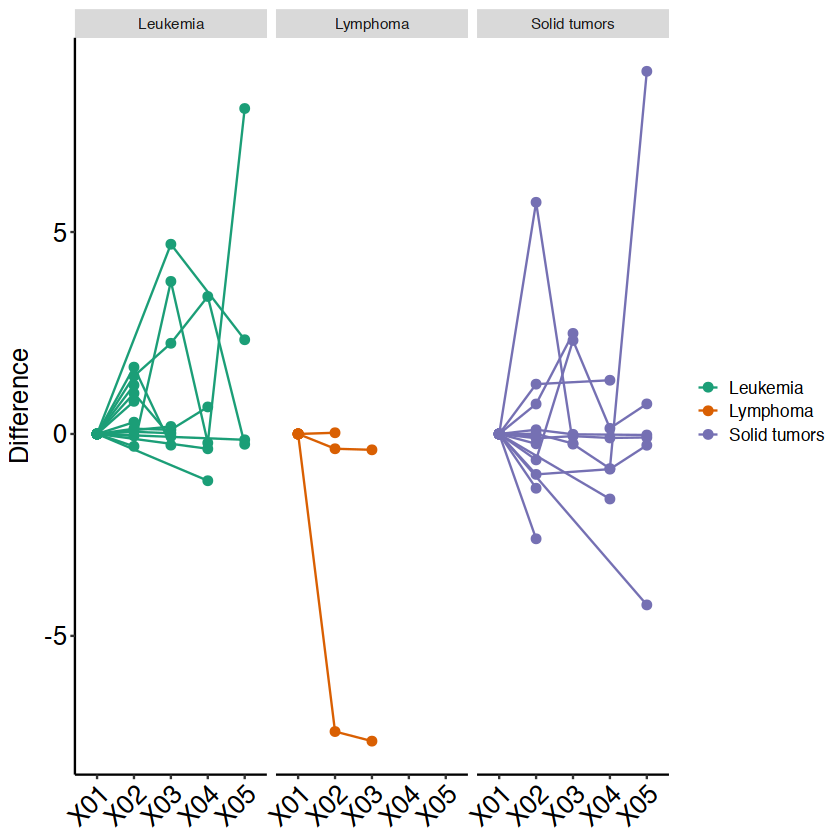

In [33]:
delta_timeseries_baseplot.fx(pbmc1, "cycle", "`Naïve/TE`", "cancergroup", group_col) +
  facet_wrap(~cancergroup, nrow = 1)